# Theory

Logistic Regression is a statistical method used for binary classification tasks, where the goal is to predict the probability (OUTPUTS PROBABILITIES) that an instance belongs to a particular class. Despite its name, logistic regression is used for classification, not regression.

Logistic regression is a simple yet effective algorithm for binary classification problems, especially when the relationship between features and the target variable is approximately linear. However, it might struggle with complex relationships that can't be captured well with a linear decision boundary.

# Assumptions

The data here has been preprocessed the data, including handling missing values, encoding categorical variables.

# Read in data

data can be downloaded from here: https://www.kaggle.com/datasets/fivethirtyeight/the-ultimate-halloween-candy-power-ranking

In [35]:
###parameter inputs
# 1. specify the csv of data
csv_data_path = 'candy-data.csv' #
#############################################################

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load your preprocessed dataset
data = pd.read_csv(csv_data_path)
print(data.head(3))
data.info()
data.columns
data.describe()

  competitorname  chocolate  fruity  caramel  peanutyalmondy  nougat  \
0      100 Grand          1       0        1               0       0   
1   3 Musketeers          1       0        0               0       1   
2       One dime          0       0        0               0       0   

   crispedricewafer  hard  bar  pluribus  sugarpercent  pricepercent  \
0                 1     0    1         0         0.732         0.860   
1                 0     0    1         0         0.604         0.511   
2                 0     0    0         0         0.011         0.116   

   winpercent  
0   66.971725  
1   67.602936  
2   32.261086  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel        

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


**A bit about the data used in the example**

candy-data.csv includes attributes for each candy along with its ranking. For binary variables, 1 means yes, 0 means no. The data contains the following fields:

- chocolate: Does it contain chocolate?
- fruity: Is it fruit flavored?
- caramel: Is there caramel in the candy?
- peanutalmondy: Does it contain peanuts, peanut butter or almonds?
- nougat: Does it contain nougat?
- crispedricewafer: Does it contain crisped rice, wafers, or a cookie component?
- hard: Is it a hard candy?
- bar: Is it a candy bar?
- pluribus: Is it one of many candies in a bag or box?
- sugarpercent: The percentile of sugar it falls under within the data set.
- pricepercent: The unit price percentile compared to the rest of the set.
- winpercent: The overall win percentage according to 269,000 matchups.


**Inspiration:**
- Which qualities are associated with higher rankings?
- What’s the most popular candy? Least popular?
- Can you recreate the 538 analysis of this dataset?

# Define target and features

In [24]:
data_model = data.select_dtypes(["int", float])

col_names = list(data_model.columns)
# Define features and target variable
target = 'chocolate'

col_names.remove(target)
features = col_names  # Add relevant features

print(f'target is {target}')
print(f'features is {features}')

target is chocolate
features is ['fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent', 'pricepercent', 'winpercent']


# Train model and print out accuracy

In [27]:
# Split the data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.1%}")
print("Classification Report:\n", classification_rep)


Accuracy: 94.1%
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.88      0.93         8

    accuracy                           0.94        17
   macro avg       0.95      0.94      0.94        17
weighted avg       0.95      0.94      0.94        17



# Predict probabilities

In [38]:
y_pred_probs = model.predict_proba(X_test_scaled)[:,1] # take all rows but take the second column index '1' representing the probabiltiies for the positive outcome
y_pred_probs

array([0.0608279 , 0.99585209, 0.35235753, 0.70207479, 0.0074967 ,
       0.04945934, 0.48319588, 0.18246962, 0.11579795, 0.18936596,
       0.94602592, 0.90434059, 0.69757115, 0.00829992, 0.04318229,
       0.92676724, 0.91594076])

# Probability thresholds

- by default, logistic regression threshold = 0.5
- the threshold could be varied

## ROC curve

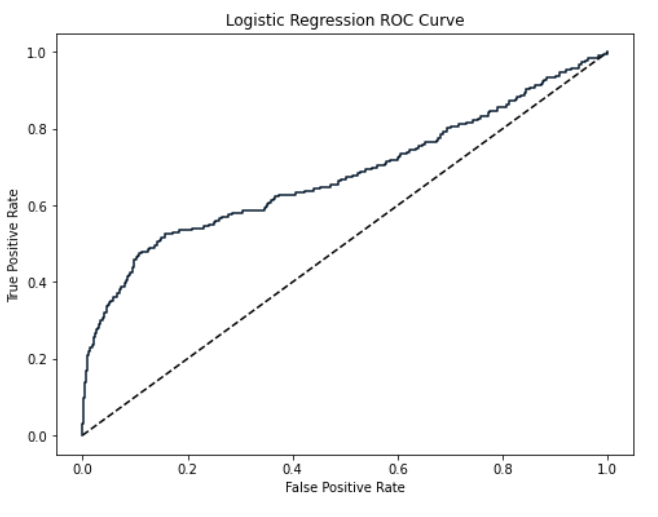

In [1]:
from IPython.display import Image, display
display(Image(filename='ROC_curve.png'))

fpr: [0. 0. 0. 1.]
tpr: [0.    0.125 1.    1.   ]
thresholds: [1.99585209 0.99585209 0.48319588 0.0074967 ]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

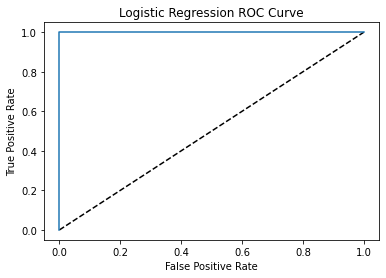

In [49]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)  # fpr false positive rate, tpr true positive rate
print(f'fpr: {fpr}')
print(f'tpr: {tpr}')
print(f'thresholds: {thresholds}')


plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()


## ROC AUC - Evaluating how well the model performs

The area under the ROC gives an indication of how well the model fit the data. Higher ROC AUC is preferred (max is 1)

In [42]:
# ROC AUC in scikit-learn

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

1.0


# SCALE the process

## define run_logistic_regression() 

and test using example dataset

target is chocolate
features is ['fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent', 'pricepercent', 'winpercent']
Accuracy: 94.1%
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.88      0.93         8

    accuracy                           0.94        17
   macro avg       0.95      0.94      0.94        17
weighted avg       0.95      0.94      0.94        17

y predictions are {y_pred_probs}
fpr: [0. 0. 0. 1.]
tpr: [0.    0.125 1.    1.   ]
thresholds: [1.99585209 0.99585209 0.48319588 0.0074967 ]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

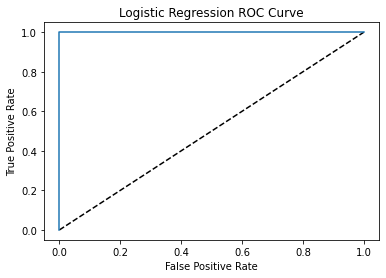

The roc_auc_score is 1.0


In [6]:
###parameter inputs
# 1. specify the csv of data
# csv_data_path = 'candy-data.csv' #
# target_var = 'chocolate'

def run_logistic_regression(csv_data_path, target):
#############################################################

    import pandas as pd
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score, classification_report


    # Load your preprocessed dataset
    data = pd.read_csv(csv_data_path)
    # print(data.head(3))
    # data.info()
    # data.columns
    # data.describe()

    # select only integer and float columns to train on
    data_model = data.select_dtypes(["int", float])

    col_names = list(data_model.columns)
    # Define features and target variable
    # target_var = 'chocolate'

    col_names.remove(target)
    features = col_names  # Add relevant features

    print(f'target is {target}')
    print(f'features is {features}')


    # Split the data into training and testing sets
    X = data[features]
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Build and train the logistic regression model
    model = LogisticRegression()
    model.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    print(f"Accuracy: {accuracy:.1%}")
    print("Classification Report:\n", classification_rep)

    y_pred_probs = model.predict_proba(X_test_scaled)[:,1] # take all rows but take the second column index '1' representing the probabiltiies for the positive outcome
    print('y predictions are {y_pred_probs}')

    # evaluate how good the model is, plot the ROC curve
    from sklearn.metrics import roc_curve

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)  # fpr false positive rate, tpr true positive rate
    print(f'fpr: {fpr}')
    print(f'tpr: {tpr}')
    print(f'thresholds: {thresholds}')


    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Logistic Regression ROC Curve')
    plt.show()


    # calculate the area under the ROC curve ("ROC AUC"), positive means better than a random guess (baseline), 1 = perfect model

    from sklearn.metrics import roc_auc_score
    print('The roc_auc_score is {}'.format(roc_auc_score(y_test, y_pred_probs)))


run_logistic_regression(csv_data_path = 'candy-data.csv', target = 'chocolate')


## try with epi_r (dataset 2) - WIP data needs proprocessing

- Epicurious - Recipes with Rating and Nutrition see https://www.kaggle.com/datasets/hugodarwood/epirecipes
- Target - #cakeweek (Can you predict whether a recipe was part of #cakeweek based on whether it its other features?)

In [5]:
###parameter inputs
# 1. specify the csv of data
csv_data_path = 'epi_r.csv' #
#############################################################

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load your preprocessed dataset
data = pd.read_csv(csv_data_path)
print(data.head(3))
data.info()
data.columns
data.describe()

                                         title  rating  calories  protein  \
0              Lentil, Apple, and Turkey Wrap    2.500     426.0     30.0   
1  Boudin Blanc Terrine with Red Onion Confit    4.375     403.0     18.0   
2                Potato and Fennel Soup Hodge    3.750     165.0      6.0   

    fat  sodium  #cakeweek  #wasteless  22-minute meals  3-ingredient recipes  \
0   7.0   559.0        0.0         0.0              0.0                   0.0   
1  23.0  1439.0        0.0         0.0              0.0                   0.0   
2   7.0   165.0        0.0         0.0              0.0                   0.0   

   ...  yellow squash  yogurt  yonkers  yuca  zucchini  cookbooks  leftovers  \
0  ...            0.0     0.0      0.0   0.0       0.0        0.0        0.0   
1  ...            0.0     0.0      0.0   0.0       0.0        0.0        0.0   
2  ...            0.0     0.0      0.0   0.0       0.0        0.0        0.0   

   snack  snack week  turkey  
0    0.0      

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,20052.000000,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,...,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000
mean,3.714467,6.322958e+03,100.160793,3.468775e+02,6.225975e+03,0.000299,0.000050,0.000848,0.001346,0.000349,...,0.001247,0.026332,0.000050,0.000299,0.014861,0.000150,0.000349,0.001396,0.000948,0.022741
std,1.340829,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05,0.017296,0.007062,0.029105,0.036671,0.018681,...,0.035288,0.160123,0.007062,0.017296,0.121001,0.012231,0.018681,0.037343,0.030768,0.149080
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,1.980000e+02,3.000000,7.000000e+00,8.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,3.310000e+02,8.000000,1.700000e+01,2.940000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,5.860000e+02,27.000000,3.300000e+01,7.110000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
run_logistic_regression(csv_data_path = 'epi_r.csv', target = '#cakeweek')


target is #cakeweek
features is ['rating', 'calories', 'protein', 'fat', 'sodium', '#wasteless', '22-minute meals', '3-ingredient recipes', '30 days of groceries', 'advance prep required', 'alabama', 'alaska', 'alcoholic', 'almond', 'amaretto', 'anchovy', 'anise', 'anniversary', 'anthony bourdain', 'aperitif', 'appetizer', 'apple', 'apple juice', 'apricot', 'arizona', 'artichoke', 'arugula', 'asian pear', 'asparagus', 'aspen', 'atlanta', 'australia', 'avocado', 'back to school', 'backyard bbq', 'bacon', 'bake', 'banana', 'barley', 'basil', 'bass', 'bastille day', 'bean', 'beef', 'beef rib', 'beef shank', 'beef tenderloin', 'beer', 'beet', 'bell pepper', 'berry', 'beverly hills', 'birthday', 'biscuit', 'bitters', 'blackberry', 'blender', 'blue cheese', 'blueberry', 'boil', 'bok choy', 'bon appétit', 'bon app��tit', 'boston', 'bourbon', 'braise', 'bran', 'brandy', 'bread', 'breadcrumbs', 'breakfast', 'brie', 'brine', 'brisket', 'broccoli', 'broccoli rabe', 'broil', 'brooklyn', 'brown ric

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').